### import Libraries

In [1]:
import pandas as pd
from prophet import Prophet

The Facebook Prophet model only works with data that contains a string time-series format in a column called “ds” and continuous values in a column called “y”. So we need to create the data accordingly:

In [2]:
df = pd.read_csv('BTC-USD.csv')
df = df[["Date","Close"]]
df.columns = ["ds","y"]
print(df)

             ds             y
0    2022-09-09  21381.152344
1    2022-09-10  21680.539063
2    2022-09-11  21769.255859
3    2022-09-12  22370.449219
4    2022-09-13  20296.707031
..          ...           ...
361  2023-09-05  25779.982422
362  2023-09-06  25753.236328
363  2023-09-07  26240.195313
364  2023-09-08  25905.654297
365  2023-09-09  25873.064453

[366 rows x 2 columns]


Now let’s fit the data into our model:

In [3]:
prophet = Prophet()
prophet.fit(df)

14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] done processing


Now let’s make predictions. The make_future_dataframe method in Prophet model has a parameter named as ‘periods’, we can use it to set the amount of time we need to make predictions. Now let’s make predictions for the next 365 days:

In [5]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2022-09-09
1   2022-09-10
2   2022-09-11
3   2022-09-12
4   2022-09-13
..         ...
726 2024-09-04
727 2024-09-05
728 2024-09-06
729 2024-09-07
730 2024-09-08

[731 rows x 1 columns]


In [6]:
forecast = prophet.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2024-02-22,24549.585974,18421.410721,30374.435997
532,2024-02-23,24579.670473,18136.373504,30509.082617
533,2024-02-24,24551.348079,17840.570528,30467.338556
534,2024-02-25,24593.976633,18047.817445,30622.706509
535,2024-02-26,24517.216160,18081.903625,30502.625915
...,...,...,...,...
726,2024-09-04,21215.183438,2943.646918,39773.575965
727,2024-09-05,21122.406445,2653.164438,39672.214624
728,2024-09-06,21152.490945,2544.210210,40052.671154
729,2024-09-07,21124.168551,2572.387328,40361.173213


Now let's plot our predictions:

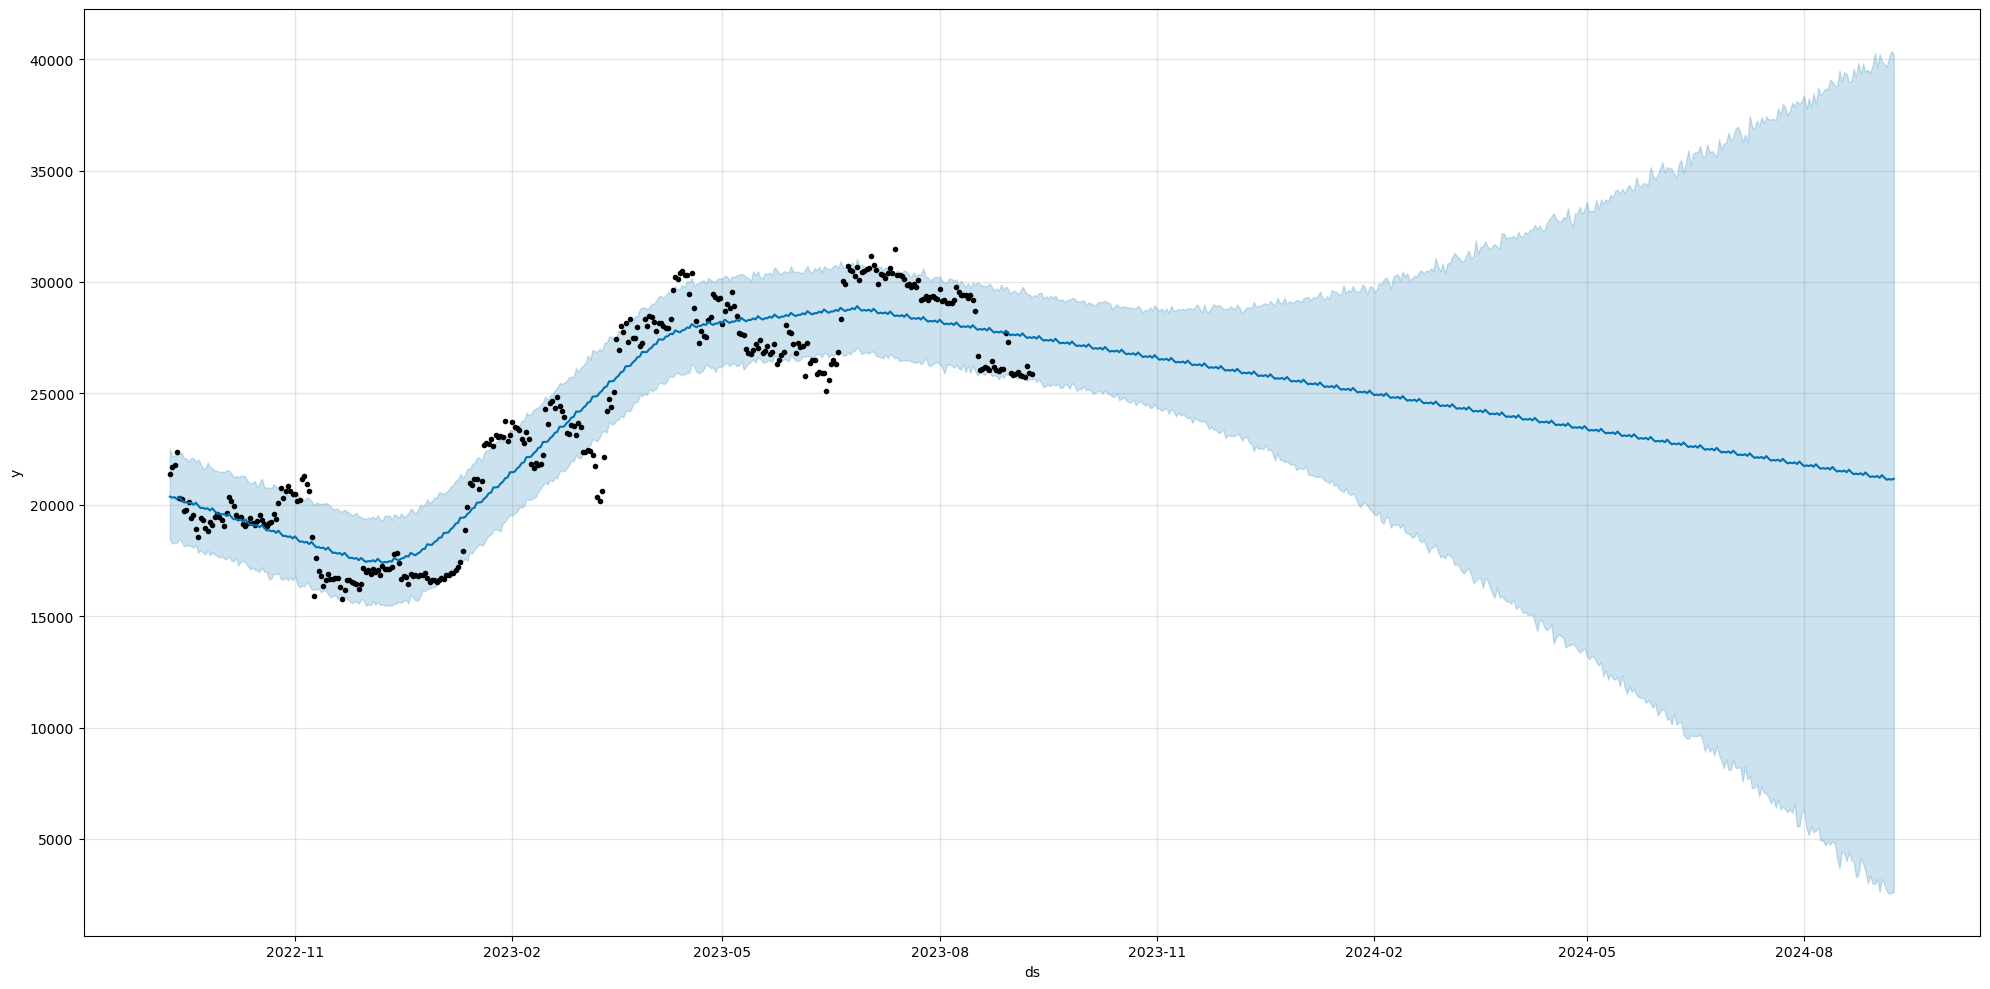

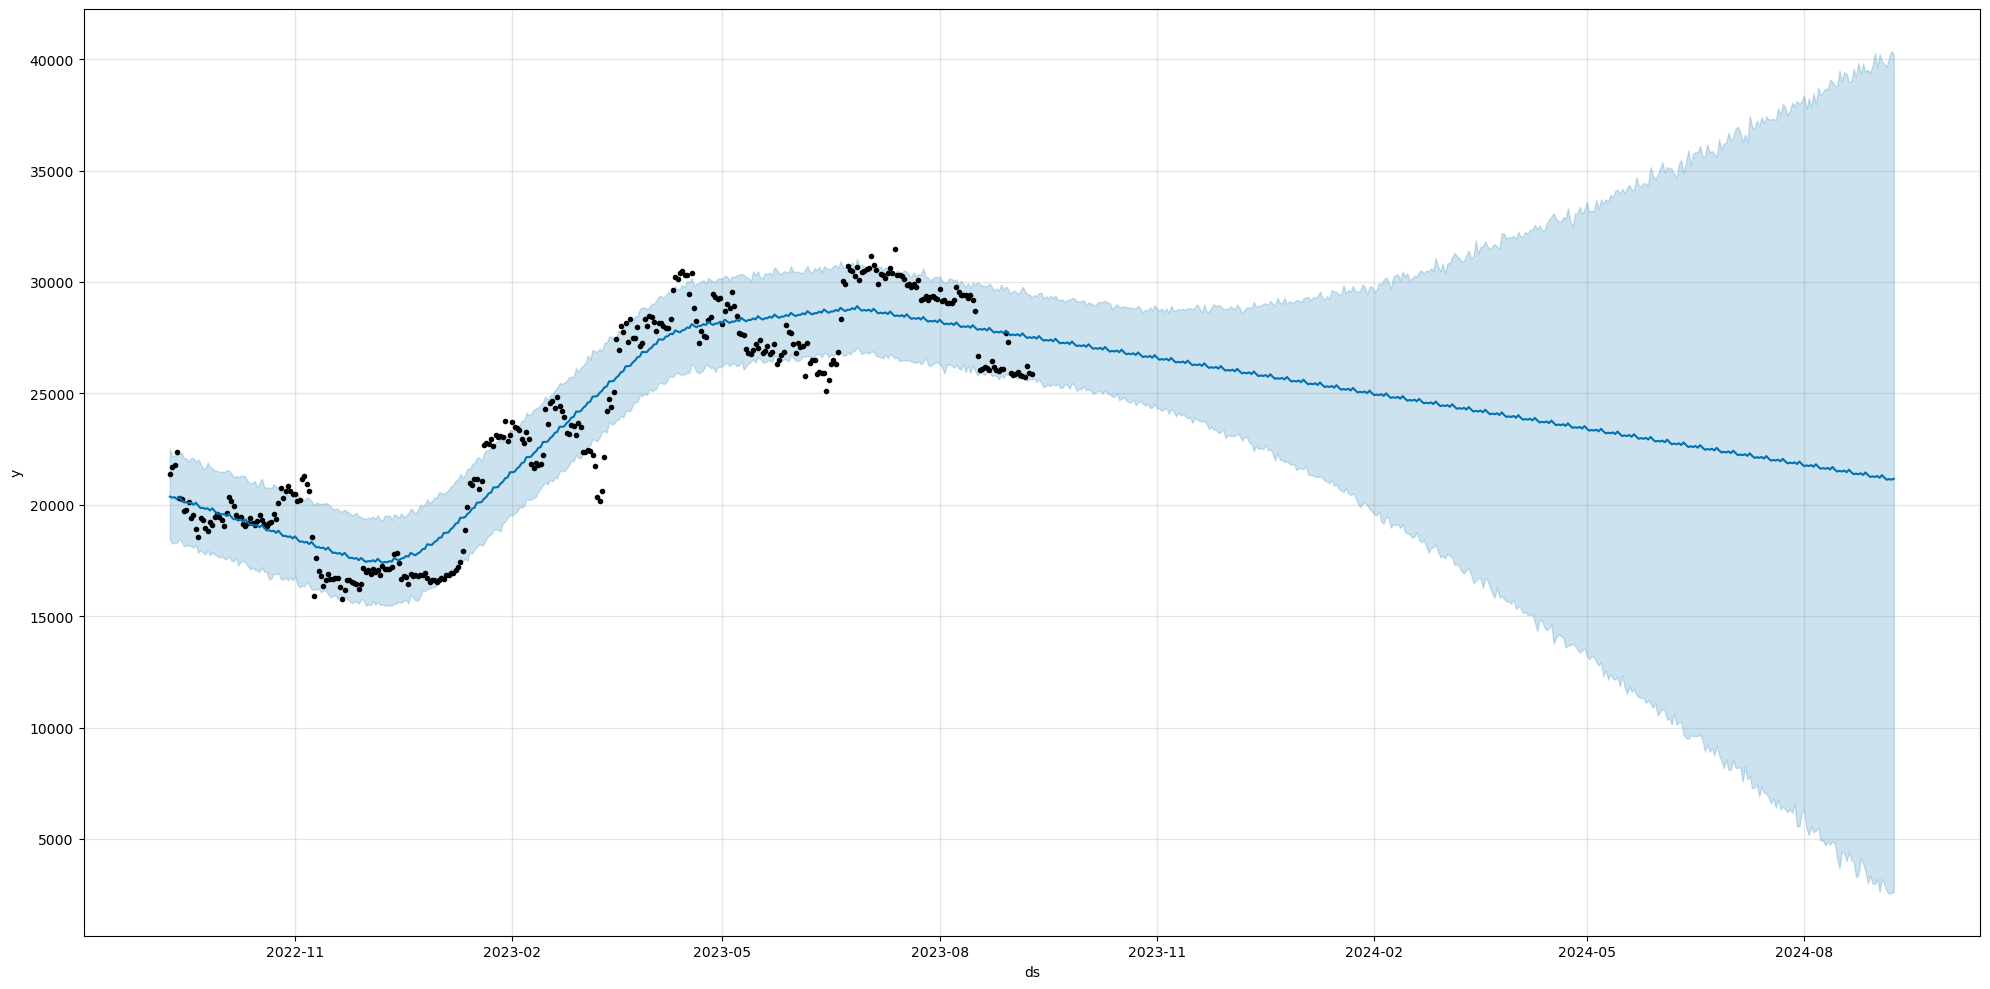

In [7]:
from prophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))

Source:

https://thecleverprogrammer.com/2021/01/05/bitcoin-price-prediction-with-python/